<a href="https://colab.research.google.com/github/ThangaPrabha03/EmotionDetection/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openai-whisper librosa scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 35.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s e

In [ ]:
# Install required packages (if not already installed)
!pip install -q openai-whisper moviepy librosa scikit-learn

import whisper
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from moviepy.editor import AudioFileClip
from google.colab import files
import os

# Step 1: Load Whisper Model for Speech Recognition
model = whisper.load_model("base")

# Step 2: Transcribe Speech using Whisper
def transcribe_audio(audio_path):
    result = model.transcribe(audio_path)
    print("Transcription:", result["text"])
    return result["text"], result["language"]

# Step 3: Extract Audio Features (MFCCs and Pitch) for Emotion Recognition
def extract_audio_features(audio_path):
    y, sr = librosa.load(audio_path, sr=16000)

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    pitch, _ = librosa.core.piptrack(y=y, sr=sr)
    pitch_mean = np.mean(pitch, axis=1)

    # Get MFCC and pitch features (13 + 13 = 26 features)
    mfcc_features = np.mean(mfcc, axis=1)
    pitch_features = pitch_mean[:13]

    audio_features = np.concatenate([mfcc_features, pitch_features])
    return audio_features

# Step 4: Train a Simple Emotion Recognition Model
def train_emotion_classifier():
    X = np.random.rand(100, 26)  # Dummy features (13 MFCC + 13 pitch)
    y = np.random.choice(['happy', 'sad', 'angry', 'neutral'], size=100)

    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    classifier = SVC(kernel='linear')
    classifier.fit(X, y_encoded)

    return classifier, le

# Step 5: Classify Emotion
def classify_emotion(features, classifier, le):
    emotion_idx = classifier.predict([features])[0]
    emotion = le.inverse_transform([emotion_idx])[0]
    return emotion

# Step 6: Convert MP4 to WAV
def convert_mp4_to_wav(mp4_path, wav_path):
    audio_clip = AudioFileClip(mp4_path)
    audio_clip.write_audiofile(wav_path, codec='pcm_s16le')
    audio_clip.close()

# Step 7: Combine Everything
def emotion_aware_speech_recognition(mp4_path):
    wav_path = "/content/temp_audio.wav"
    convert_mp4_to_wav(mp4_path, wav_path)

    transcription, language = transcribe_audio(wav_path)
    audio_features = extract_audio_features(wav_path)
    emotion = classify_emotion(audio_features, emotion_classifier, label_encoder)

    print(f"Detected Emotion: {emotion}")
    print(f"Language Detected: {language}")

# Step 8: Train Emotion Classifier (once)
emotion_classifier, label_encoder = train_emotion_classifier()

# Step 9: Upload and Process File
uploaded = files.upload()

for filename in uploaded.keys():
    audio_path = f"/content/{filename}"
    print(f"Processing file: {audio_path}")
    emotion_aware_speech_recognition(audio_path)


Saving WhatsApp Ptt 2025-04-21 at 2.24.42 PM.ogg to WhatsApp Ptt 2025-04-21 at 2.24.42 PM.ogg
Processing file: /content/WhatsApp Ptt 2025-04-21 at 2.24.42 PM.ogg
MoviePy - Writing audio in /content/temp_audio.wav


  warnings.warn("FP16 is not supported on CPU; using FP32 instead")



MoviePy - Done.
Transcription:  Shut up idiot!
Detected Emotion: angry
Language Detected: en


Saving smile2.jpg to smile2.jpg


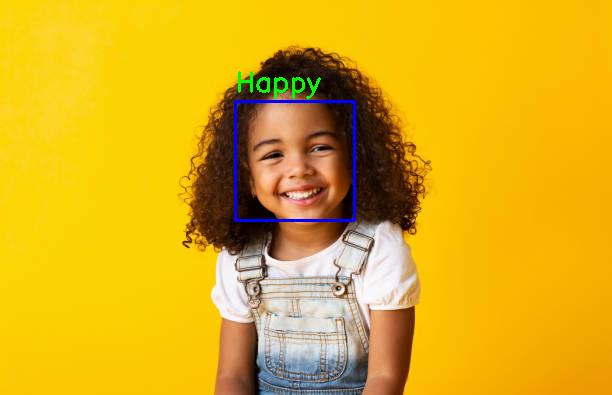

In [ ]:
# ✅ Install dependencies
!pip install -q keras opencv-python

# ✅ Download pre-trained emotion model (Mini-XCEPTION, expects 64x64 grayscale)
!wget -q https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5 -O emotion_model.h5

# ✅ Import everything
import cv2
import numpy as np
from keras.models import load_model
from google.colab import files
from google.colab.patches import cv2_imshow

# ✅ Load model
model = load_model("emotion_model.h5", compile=False)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# ✅ Upload image
uploaded = files.upload()

# ✅ Load face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# ✅ Process uploaded image
for filename in uploaded.keys():
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        roi = cv2.resize(roi, (64, 64))  # 🔥 fixed shape
        roi = roi.astype("float32") / 255.0
        roi = np.expand_dims(roi, axis=-1)  # (64, 64, 1)
        roi = np.expand_dims(roi, axis=0)   # (1, 64, 64, 1)

        preds = model.predict(roi, verbose=0)
        label = emotion_labels[np.argmax(preds)]

        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # ✅ Show result
    cv2_imshow(img)
